## DeepVoxNet 2: 1/2/3 D image classification/segmentation


In [10]:
import numpy as np
from deepvoxnet2.components.mirc import Mirc, Dataset, Case, Record, ArrayModality
from skimage.draw import disk
from matplotlib import pyplot as plt

1. Organise your data as a Mirc object

In the following example we will create a dummy tumor segmentation dataset, consisting of 100 cases (i.e. subjects). Each case will have one tumor record, consisting of a head CT and a manual tumor segmentation.

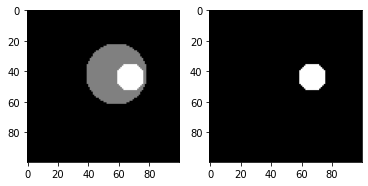

In [11]:
def generate_record(record_id):
    record = Record(record_id=record_id)
    head = np.zeros((100, 100))
    head_center = np.random.randint(40, 60, 2)
    head_radius = np.random.randint(20, 25)
    head_xs, head_ys = disk(head_center, head_radius)
    head[head_xs, head_ys] = 1
    tumor = np.zeros((100, 100))
    tumor_center = (np.random.randint(head_center[0] - 10, head_center[0] + 10), np.random.randint(head_center[1] - 10, head_center[1] + 10))
    tumor_radius = np.random.randint(5, 10)
    tumor_xs, tumor_ys = disk(tumor_center, tumor_radius)
    tumor[tumor_xs, tumor_ys] = 1
    record.add(ArrayModality("ct", head + tumor))
    record.add(ArrayModality("tumor", tumor))
    return record

mirc = Mirc()
dataset = Dataset(dataset_id="dataset_0")
for i in range(100):
    case = Case(case_id=f"case_{i}")
    case.add(generate_record(record_id="record_0"))
    dataset.add(case)

mirc.add(dataset)
record = mirc["dataset_0"]["case_0"]["record_0"]
ct = record["ct"].load()
tumor = record["tumor"].load()
fig, axs = plt.subplots(1, 2)
axs[0].imshow(ct[0, :, :, 0, 0], cmap="gray")
axs[1].imshow(tumor[0, :, :, 0, 0], cmap="gray")
plt.show()
